In [16]:
import numpy as np
from osgeo import gdal
gdal.UseExceptions()

mrf_path = '/home/jon/git/road_surface_classifier/aws_stuff/co/2019/60cm/rgbir/39104/m_3910460_sw_13_060_20190908.mrf'

ds: gdal.Dataset = gdal.Open(mrf_path)
im = ds.GetRasterBand(1).ReadAsArray()
im = im[:, :, np.newaxis].repeat(ds.RasterCount, axis=-1)
for ii in range(1, ds.RasterCount):
    im[:, :, ii] = ds.GetRasterBand(ii + 1).ReadAsArray()

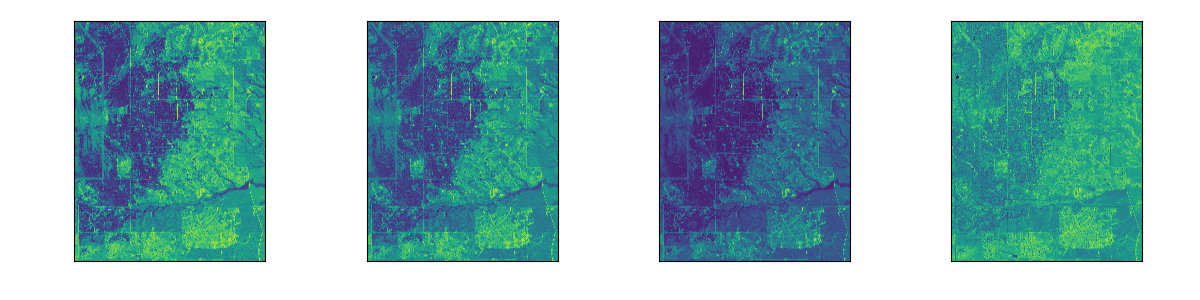

In [17]:

%matplotlib widget
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, im.shape[2], sharex=True, sharey=True, figsize=(3 * im.shape[2], 3))
fig.tight_layout()
for ii, _ax in enumerate(ax):
    _ax.imshow(im[:, :, ii])
    _ax.get_xaxis().set_visible(False)
    _ax.get_yaxis().set_visible(False)